<a href="https://colab.research.google.com/github/Tamzid19597/CryptoCurrencyPricePrediction/blob/main/LSTM_GRU_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
# Importing Library
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('BTC-USD.csv')
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])
maindf.shape
(2713, 7)
maindf.head()

Total number of days present in the dataset:  1399
Total number of fields present in the dataset:  7


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1394,2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,20770.441406,58895950537
1395,2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,20285.835938,49625110402
1396,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910
1397,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645
1398,2022-10-30,20826.878906,20826.878906,20726.173828,20763.728516,20763.728516,39206326272


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1399 non-null   object 
 1   Open       1399 non-null   float64
 2   High       1399 non-null   float64
 3   Low        1399 non-null   float64
 4   Close      1399 non-null   float64
 5   Adj Close  1399 non-null   float64
 6   Volume     1399 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.6+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1.399000e+03
mean,23794.036359,24387.922946,23132.219474,23803.209262,23803.209262,3.184846e+10
std,17902.469615,18370.298883,17349.433472,17889.422739,17889.422739,1.881027e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09
25%,8934.328613,9175.017578,8805.774902,8965.702637,8965.702637,1.981915e+10
50%,18534.650391,18919.550781,18000.796875,18553.916016,18553.916016,2.881346e+10
75%,39326.230469,40419.029297,38113.238282,39316.492188,39316.492188,3.919236e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
#Checking for Null Values
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
maindf.shape

(1399, 7)

In [ ]:

# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1399, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:

# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1399, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2019-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1398


Normalizing Data
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1398, 1)


Slicing data into Training set and Testing set

In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (838, 1)
test_data:  (560, 1)


Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (822, 15)
y_train:  (822,)
X_test:  (544, 15)
y_test (544,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (822, 15, 1)
X_test:  (544, 15, 1)


Model Building

In [ ]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 50
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
# model=Sequential()

# model.add(LSTM(10,input_shape=(None,1),activation="relu"))

# model.add(Dense(1))

# model.compile(loss="mean_squared_error",optimizer="adam")
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
26/26 [==============================] - 3s 42ms/step - loss: 0.0122 - val_loss: 0.0024
Epoch 2/200
26/26 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/200
26/26 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/200
26/26 [==============================] - 0s 18ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 5/200
26/26 [==============================] - 0s 19ms/step - loss: 9.5895e-04 - val_loss: 0.0017
Epoch 6/200
26/26 [==============================] - 0s 19ms/step - loss: 9.6776e-04 - val_loss: 0.0027
Epoch 7/200
26/26 [==============================] - 0s 19ms/step - loss: 8.2316e-04 - val_loss: 0.0024
Epoch 8/200
26/26 [==============================] - 0s 19ms/step - loss: 9.3135e-04 - val_loss: 0.0016
Epoch 9/200
26/26 [==============================] - 1s 19ms/step - loss: 9.3039e-04 - val_loss: 0.0028
Epoch 10/200
26/26 [==============================] - 0s 18ms/step - loss: 8.748

Plotting Loss vs Validation loss

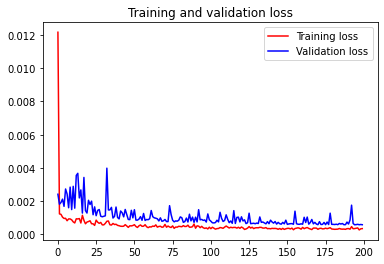

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

17/17 [==============================] - 0s 9ms/step


((822, 1), (544, 1))

Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation Metrics

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  830.6284705942766
Train data MSE:  689943.656161787
Train data MAE:  451.3122053691454
-------------------------------------------------------------------------------------
Test data RMSE:  1548.5369082359493
Test data MSE:  2397966.556168953
Test data MAE:  1114.402846380055


Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9965265979329725
Test data explained variance regression score: 0.9854314473364453


R squared score for Regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9964267008128199
Test data R2 score: 0.9851363401894534


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0025117715462902946
Test data MGD:  0.0015587727139610796
----------------------------------------------------------------------
Train data MPD:  28.240651599785483
Test data MPD:  58.48668313862125


Comparision of original Bitcoin close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1398, 1)
Test predicted data:  (1398, 1)


**GRU**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def build_gru_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(tf.keras.layers.GRU(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
gru_neurons = 100
epochs = 200
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
model = build_gru_model(
    X_train, output_size=1, neurons=gru_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/200
26/26 [==============================] - 3s 37ms/step - loss: 0.0191 - val_loss: 0.0024
Epoch 2/200
26/26 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/200
26/26 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 4/200
26/26 [==============================] - 0s 17ms/step - loss: 8.5635e-04 - val_loss: 0.0013
Epoch 5/200
26/26 [==============================] - 0s 18ms/step - loss: 8.8982e-04 - val_loss: 0.0010
Epoch 6/200
26/26 [==============================] - 0s 17ms/step - loss: 7.8517e-04 - val_loss: 9.8482e-04
Epoch 7/200
26/26 [==============================] - 0s 18ms/step - loss: 7.5138e-04 - val_loss: 9.5454e-04
Epoch 8/200
26/26 [==============================] - 0s 18ms/step - loss: 7.2563e-04 - val_loss: 0.0010
Epoch 9/200
26/26 [==============================] - 0s 18ms/step - loss: 6.4154e-04 - val_loss: 9.2878e-04
Epoch 10/200
26/26 [==============================] - 0s 17ms/st

Plotting Loss vs Validation loss

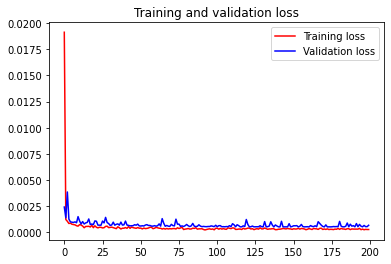

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

17/17 [==============================] - 0s 5ms/step


((822, 1), (544, 1))

Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation Metrics

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  827.8565069799681
Train data MSE:  685346.396149074
Train data MAE:  462.1841461741179
-------------------------------------------------------------------------------------
Test data RMSE:  1679.6812880134987
Test data MSE:  2821329.2293026857
Test data MAE:  1215.0431733504138


Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9964635298572572
Test data explained variance regression score: 0.985964125384681


R squared score for Regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9964505105620943
Test data R2 score: 0.9825121506511318


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0027013350487449846
Test data MGD:  0.0017330166616129367
----------------------------------------------------------------------
Train data MPD:  28.36399712877321
Test data MPD:  67.10123465507539


**LSTM-GRU**

In [ ]:
def build_lstm_gru_hybrid_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)):
    model = Sequential()
    model.add(LSTM(100,return_sequences=True, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(tf.keras.layers.GRU(200,input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
gru_neurons = 50
epochs = 200
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model = build_lstm_gru_hybrid_model(
    X_train, output_size=1, neurons=gru_neurons, dropout=dropout, loss=loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/200
26/26 [==============================] - 8s 116ms/step - loss: 0.0168 - val_loss: 0.0019
Epoch 2/200
26/26 [==============================] - 2s 74ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 3/200
26/26 [==============================] - 2s 74ms/step - loss: 9.6131e-04 - val_loss: 0.0017
Epoch 4/200
26/26 [==============================] - 2s 74ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/200
26/26 [==============================] - 2s 74ms/step - loss: 7.5202e-04 - val_loss: 0.0024
Epoch 6/200
26/26 [==============================] - 2s 74ms/step - loss: 7.9050e-04 - val_loss: 0.0031
Epoch 7/200
26/26 [==============================] - 2s 73ms/step - loss: 8.8315e-04 - val_loss: 0.0018
Epoch 8/200
26/26 [==============================] - 2s 73ms/step - loss: 7.3388e-04 - val_loss: 0.0022
Epoch 9/200
26/26 [==============================] - 2s 73ms/step - loss: 7.3419e-04 - val_loss: 0.0014
Epoch 10/200
26/26 [==============================] - 2s 73ms/step - loss: 

Plotting Loss vs Validation loss

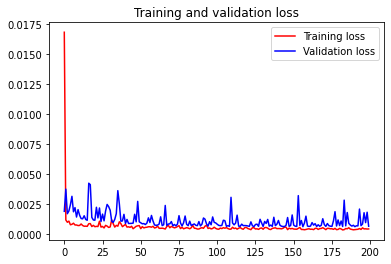

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

17/17 [==============================] - 0s 20ms/step


((822, 1), (544, 1))

Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation Metrics

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  960.3734375387866
Train data MSE:  922317.1395300656
Train data MAE:  610.0204567345271
-------------------------------------------------------------------------------------
Test data RMSE:  1611.6865778598128
Test data MSE:  2597533.625253475
Test data MAE:  1154.7456629181984


Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9953322686801975
Test data explained variance regression score: 0.9839194550801127


R squared score for Regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9952232112643236
Test data R2 score: 0.9838993350207912


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.002719953346879127
Test data MGD:  0.0018041720383485866
----------------------------------------------------------------------
Train data MPD:  33.804953977424276
Test data MPD:  66.23973444501085
